# Importing libraries

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import dataset

In [2]:
attrition = pd.read_csv("attrition.csv")

In [3]:
df1 = pd.read_csv("df1.csv")

In [4]:
df2 = pd.read_csv("df2.csv")

# Exploratory Data Analysis

In [5]:
attrition = attrition.drop(attrition.columns[0], axis=1)
attrition.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [6]:
attrition.isnull().sum()

EmployeeNumber      0
Attrition         147
dtype: int64

In [7]:
attrition.shape

(4439, 2)

In [8]:
df1 = df1.drop(df1.columns[0], axis=1)
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [9]:
df1.shape

(4439, 20)

In [10]:
df2 = df2.drop(df2.columns[0], axis=1)
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [11]:
df2.shape

(4439, 17)

In [12]:
df_merge = pd.merge(df1, df2, on='EmployeeNumber')
df_merge.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [13]:
df_merge = df_merge.drop('Attrition', axis=1)
df_merge.shape

(4439, 35)

In [14]:
df = pd.merge(df_merge, attrition, on='EmployeeNumber')

In [15]:
df.shape

(4439, 36)

In [16]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4439 entries, 0 to 4438
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4439 non-null   int64  
 1   Age                       4439 non-null   float64
 2   BusinessTravel            4439 non-null   object 
 3   DailyRate                 4439 non-null   float64
 4   Department                4439 non-null   object 
 5   DistanceFromHome          4439 non-null   float64
 6   Education                 4439 non-null   float64
 7   EducationField            4439 non-null   object 
 8   EmployeeCount             4439 non-null   float64
 9   EnvironmentSatisfaction   4439 non-null   float64
 10  Gender                    4439 non-null   object 
 11  HourlyRate                4439 non-null   float64
 12  JobInvolvement            4439 non-null   float64
 13  JobLevel                  4439 non-null   float64
 14  JobRole 

In [18]:
df.isnull().sum()

EmployeeNumber                0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [19]:
df = df.dropna()
df.isnull().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [20]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
0,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Y,Yes,No
1,Travel_Rarely,Research & Development,Medical,Female,Manufacturing Director,Married,Y,Yes,No
2,Travel_Rarely,Research & Development,Other,Female,Research Scientist,Married,Y,No,No
3,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single,Y,No,No
4,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Divorced,Y,No,No
...,...,...,...,...,...,...,...,...,...
4434,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,Y,No,Yes
4435,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,Y,No,Yes
4436,Non-Travel,Research & Development,Medical,Male,Laboratory Technician,Single,Y,No,Yes
4437,Non-Travel,Research & Development,Medical,Male,Laboratory Technician,Single,Y,No,Yes


In [21]:
for col in object_columns.columns:
    
    print(object_columns[col].value_counts())  
    print("__________________________________")

Travel_Rarely        3033
Travel_Frequently     814
Non-Travel            445
Name: BusinessTravel, dtype: int64
__________________________________
Research & Development    2809
Sales                     1302
Human Resources            181
Name: Department, dtype: int64
__________________________________
Life Sciences       1764
Medical             1341
Marketing            472
Technical Degree     390
Other                245
Human Resources       80
Name: EducationField, dtype: int64
__________________________________
Male      2588
Female    1704
Name: Gender, dtype: int64
__________________________________
Sales Executive              950
Research Scientist           879
Laboratory Technician        755
Manufacturing Director       416
Healthcare Representative    383
Manager                      287
Sales Representative         244
Research Director            229
Human Resources              149
Name: JobRole, dtype: int64
__________________________________
Married     2003
Sing

In [22]:
df_num = df.select_dtypes(include=['int','float'])
df_num.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,104,30.0,852.0,1.0,1.0,1.0,4.0,55.0,2.0,2.0,...,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0
1,1638,38.0,397.0,2.0,2.0,1.0,4.0,54.0,2.0,3.0,...,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0
2,164,26.0,841.0,6.0,3.0,1.0,3.0,46.0,2.0,1.0,...,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0
3,395,28.0,1117.0,8.0,2.0,1.0,4.0,66.0,3.0,1.0,...,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0
4,53,35.0,464.0,4.0,2.0,1.0,3.0,75.0,3.0,1.0,...,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0


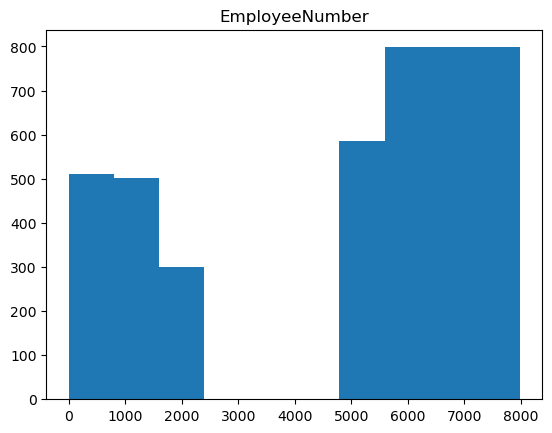

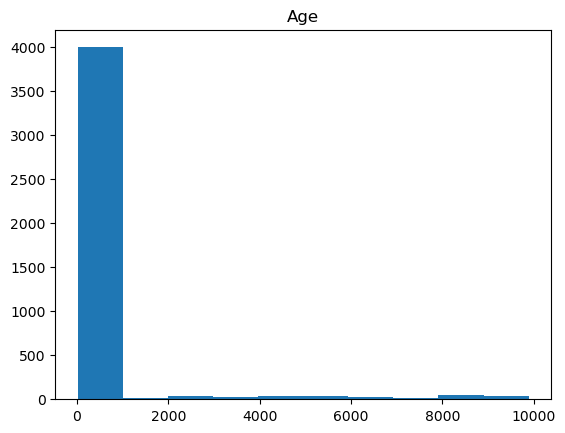

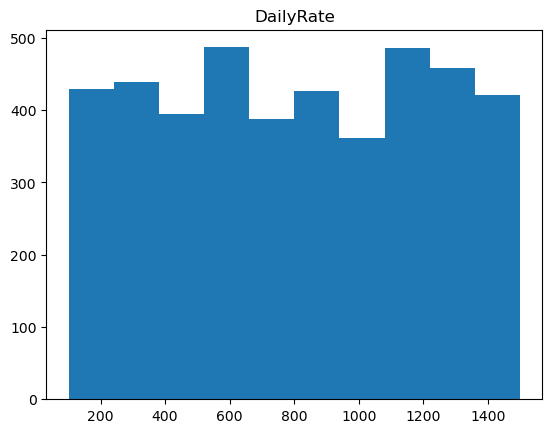

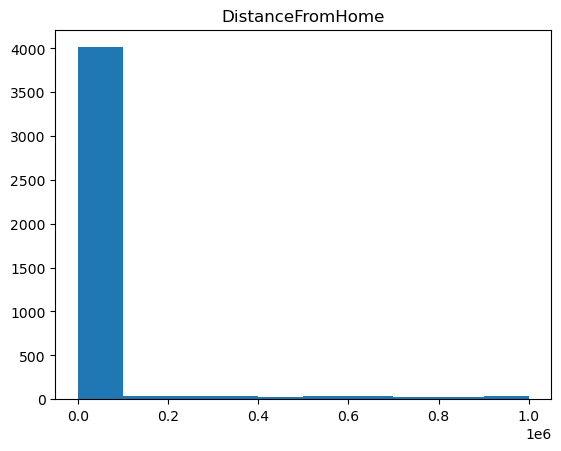

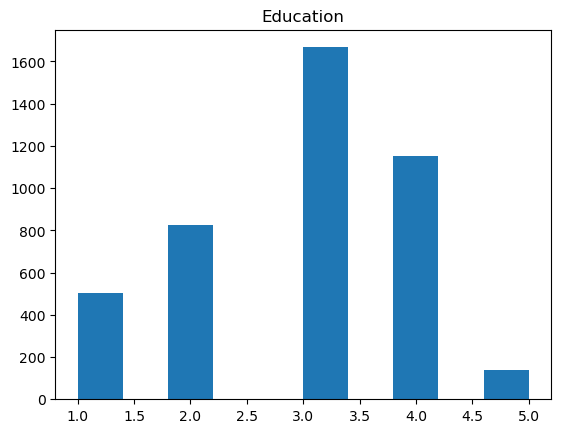

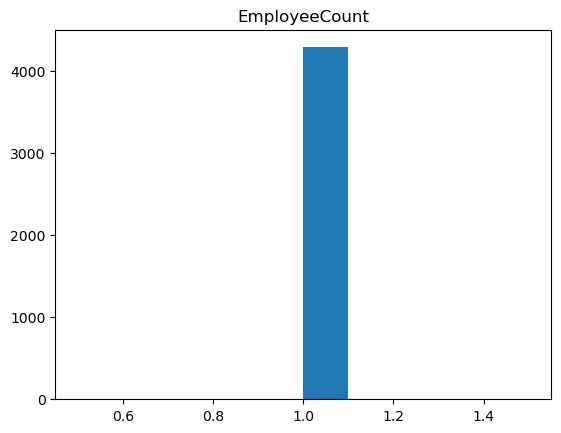

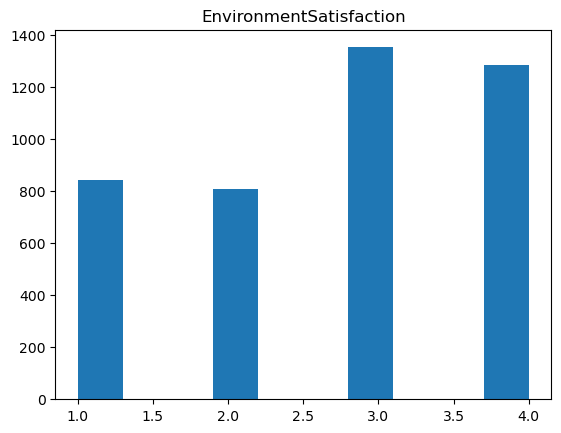

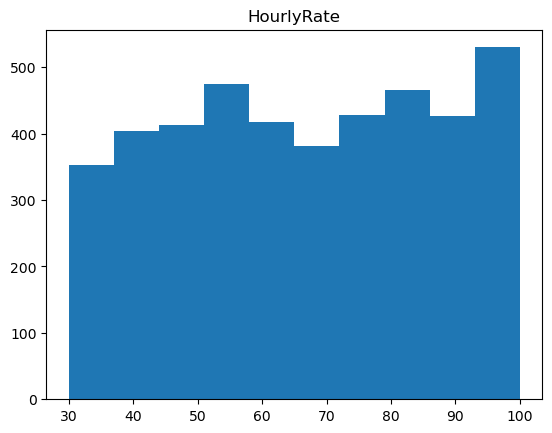

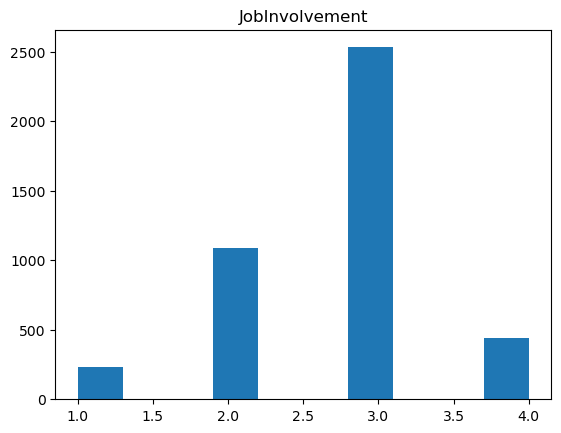

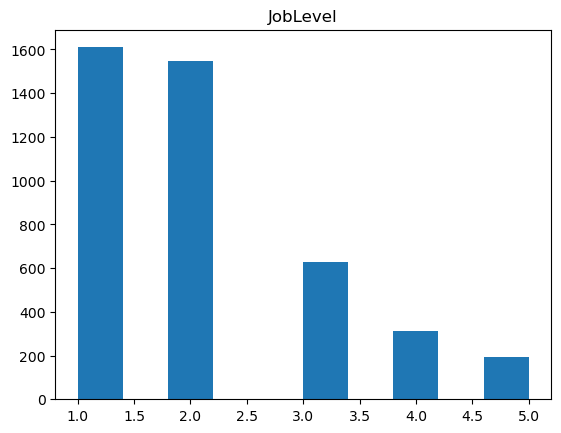

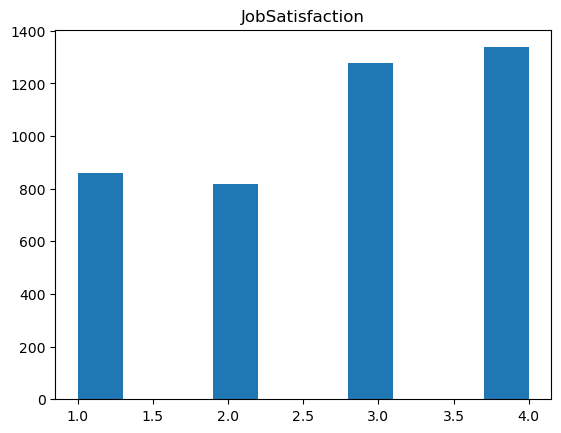

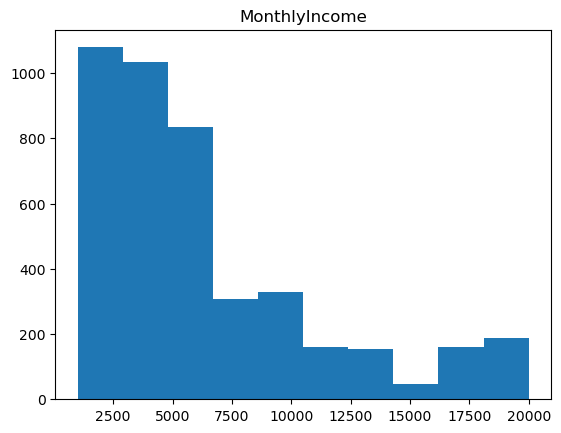

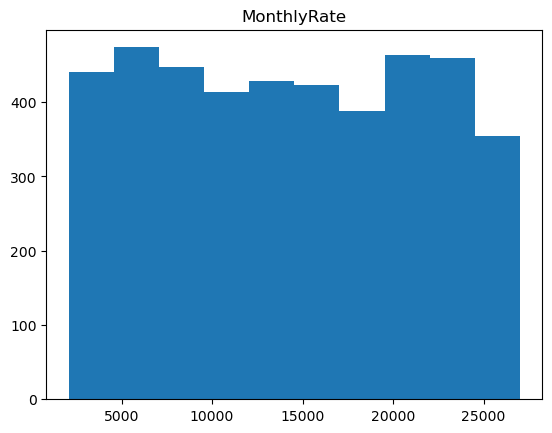

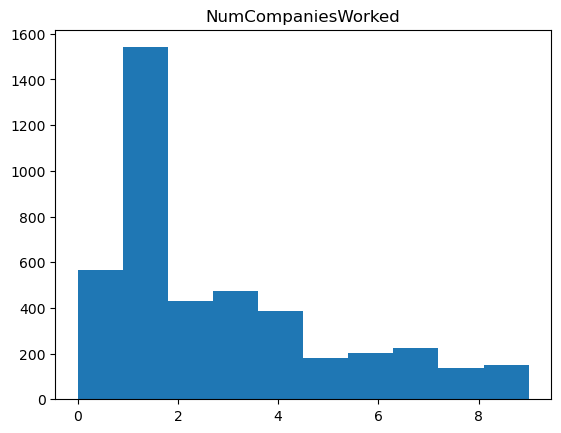

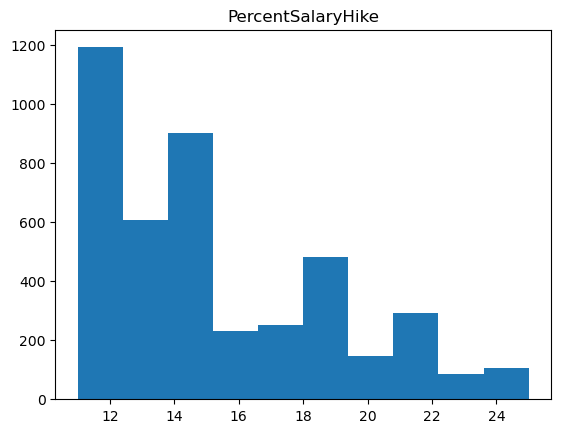

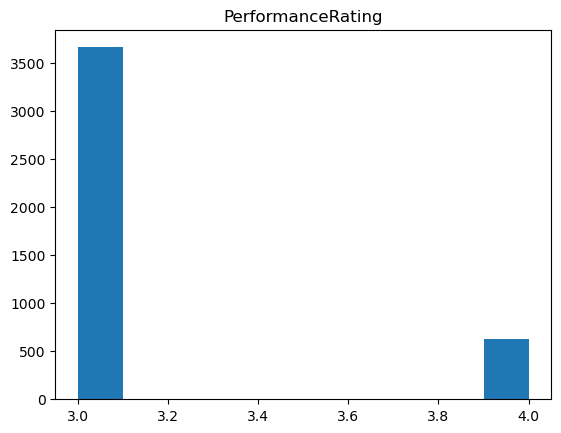

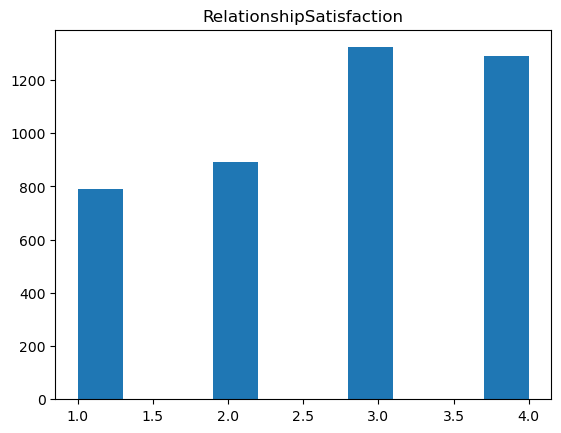

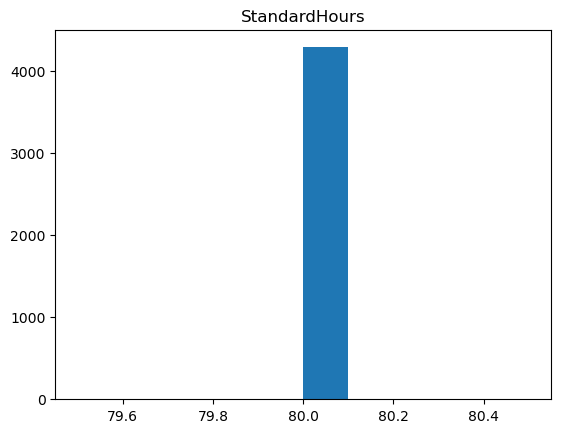

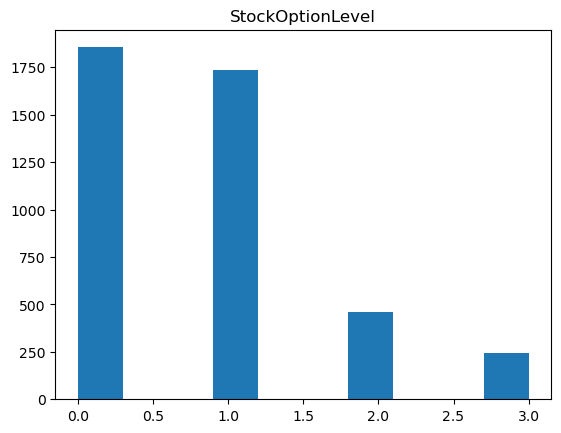

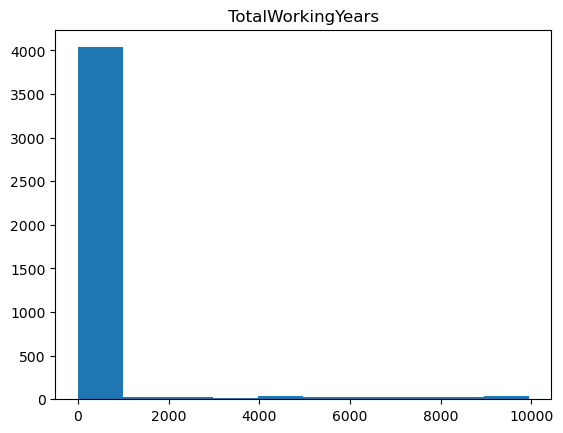

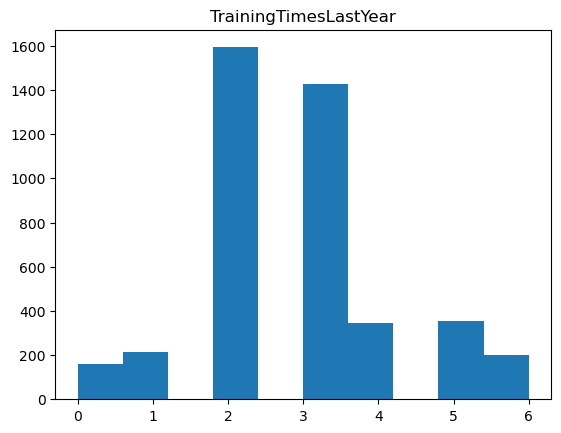

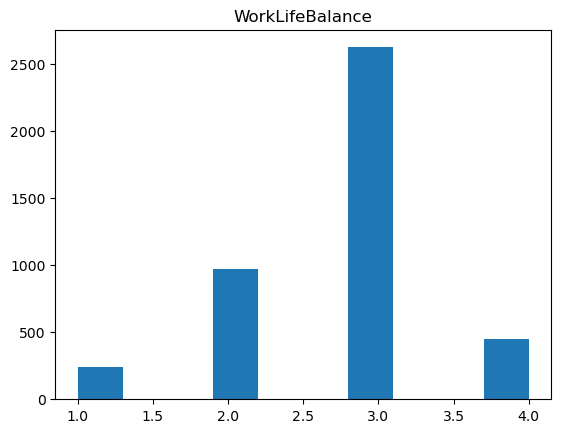

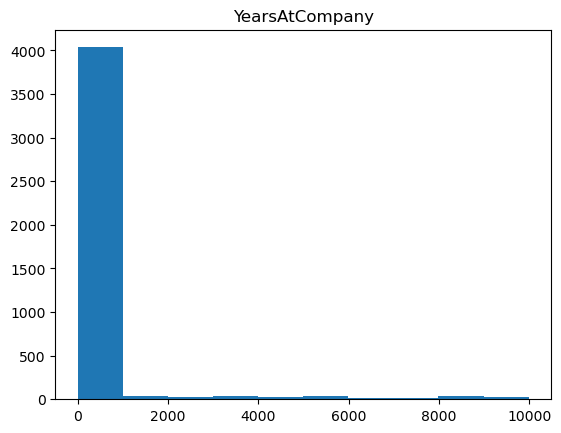

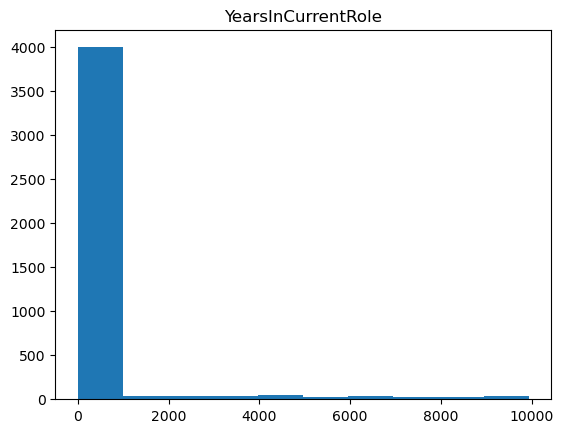

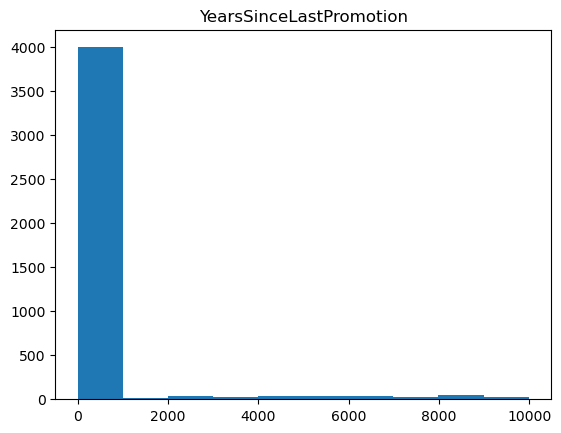

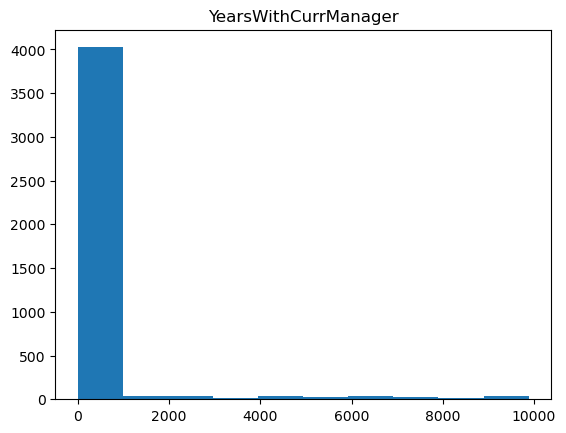

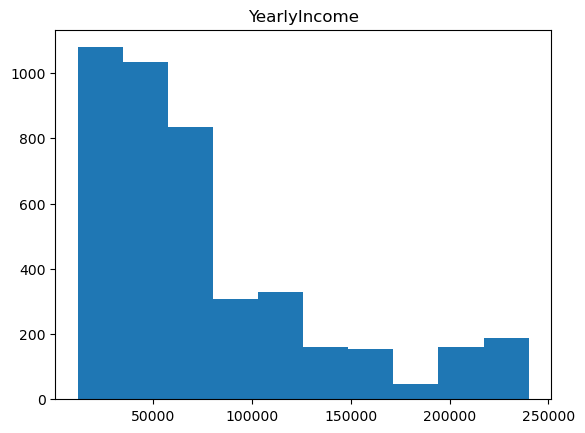

In [23]:
for column in df_num.columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [24]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.0,4292.000000,4292.00000,4292.00000,4292.000000,...,4292.0,4292.000000,4292.00000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000
mean,4817.858807,430.047297,800.770037,34558.632572,2.907036,1.0,2.719012,66.04986,2.74068,2.052889,...,80.0,0.788444,354.81151,2.801258,2.765144,313.572227,367.956664,399.929171,335.538910,77512.434296
std,2639.924172,1592.890998,405.838518,147844.911695,1.027007,0.0,1.092882,20.29848,0.71185,1.103055,...,0.0,0.849405,1509.68022,1.301226,0.708714,1375.519087,1481.726467,1599.684660,1433.570209,56105.809153
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.00000,1.00000,1.000000,...,80.0,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1690.000000,31.000000,457.000000,2.000000,2.000000,1.0,2.000000,48.00000,2.00000,1.000000,...,80.0,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34782.000000
50%,5833.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.00000,3.00000,2.000000,...,80.0,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,6906.250000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.00000,3.00000,3.000000,...,80.0,1.000000,17.00000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,99852.000000
max,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.00000,4.00000,5.000000,...,80.0,3.000000,9939.00000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


We have outliers in the columns: Age, DistanceFromHome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

## Removing Outliers

### 'Age' column

In [25]:
# Age threshold

df[df['Age'] == 80].shape

(0, 36)

In [26]:
df[df['Age'] > 80].shape

(298, 36)

(array([167., 285., 618., 721., 701., 593., 343., 236., 206., 124.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

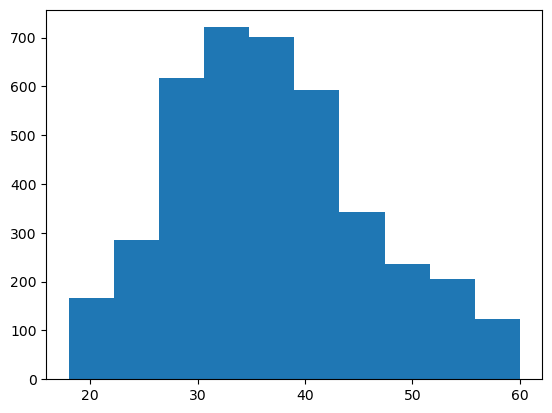

In [27]:
plt.hist(df[df['Age'] < 80]['Age'])

In [28]:
# Generating descriptive statistics

df[df['Age'] < 80]['Age'].describe()

count    3994.000000
mean       36.761642
std         9.092136
min        18.000000
25%        30.000000
50%        35.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

In [29]:
# Replacing outliers with an average age below 80

df.loc[df['Age'] > 80, 'Age'] = df[df['Age'] < 80]['Age'].mean()

## 'Years' columns

In [30]:
# Threshold for columns: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

treshold = 60
years_columns = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [31]:
for column in years_columns:
    print(column)
    print(df[df[column] < treshold].shape)

TotalWorkingYears
(4036, 36)
YearsAtCompany
(4036, 36)
YearsInCurrentRole
(3992, 36)
YearsSinceLastPromotion
(3998, 36)
YearsWithCurrManager
(4024, 36)


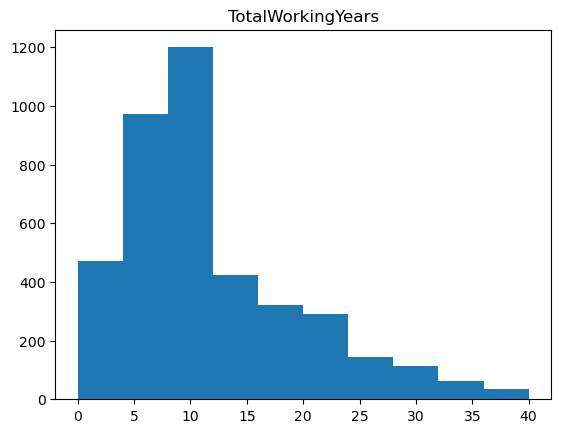

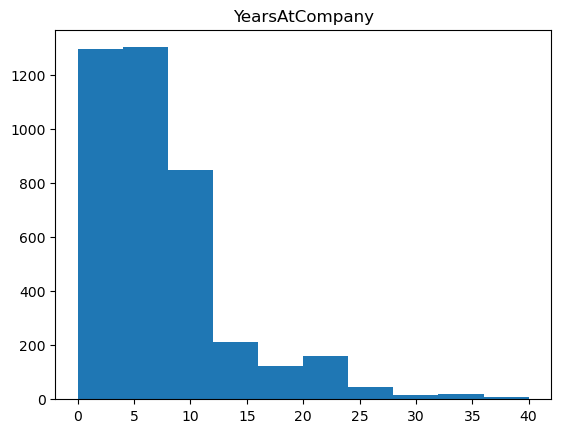

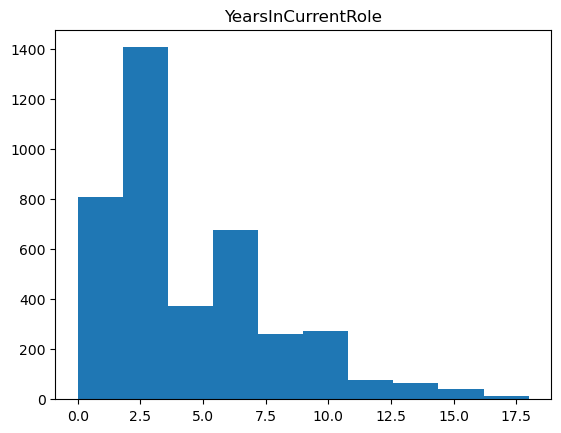

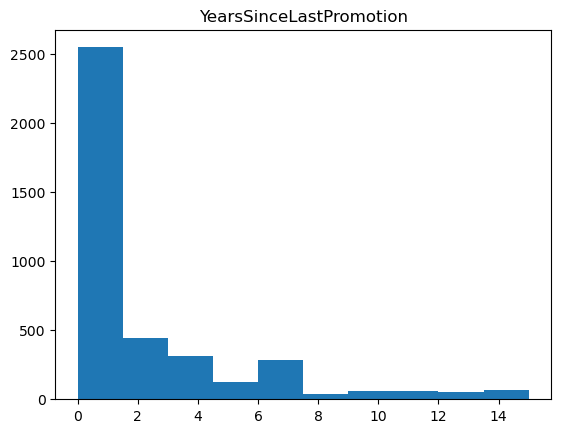

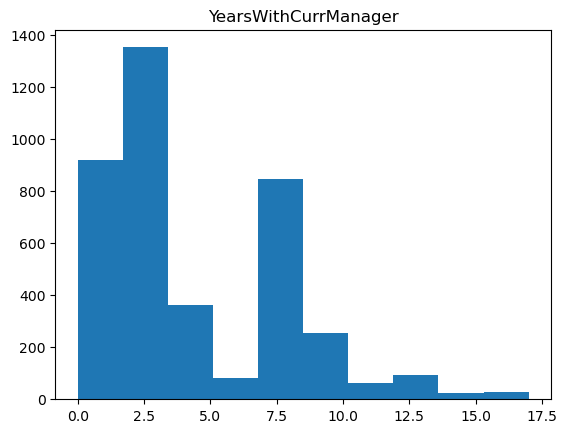

In [32]:
for column in years_columns:
    plt.hist(df[df[column] < treshold][column])
    plt.title(column)
    plt.show()

In [33]:
for column in years_columns:
    df.loc[df[column] > treshold, column] = df[df[column] < treshold][column].mean()

### DistanceFromHome column

In [34]:
df['DistanceFromHome'].describe()

count      4292.000000
mean      34558.632572
std      147844.911695
min           1.000000
25%           2.000000
50%           8.000000
75%          17.000000
max      999590.000000
Name: DistanceFromHome, dtype: float64

In [35]:
filtered_df = df[df['DistanceFromHome'] > df['DistanceFromHome'].quantile(0.93)]
filtered_df['DistanceFromHome'].shape

(279,)

(array([33., 37., 25., 24., 30., 30., 24., 21., 22., 33.]),
 array([102583. , 192283.7, 281984.4, 371685.1, 461385.8, 551086.5,
        640787.2, 730487.9, 820188.6, 909889.3, 999590. ]),
 <BarContainer object of 10 artists>)

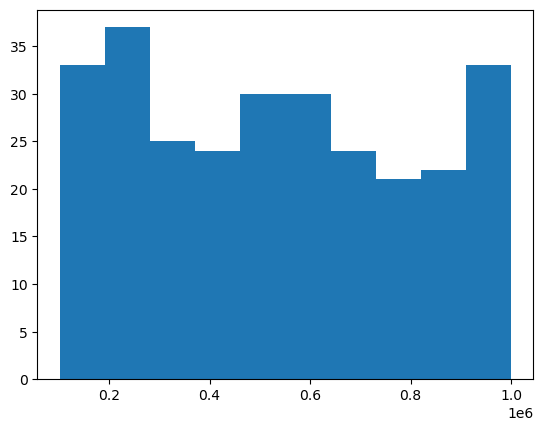

In [36]:
plt.hist(filtered_df['DistanceFromHome'])

In [37]:
df.loc[df['DistanceFromHome'] > df['DistanceFromHome'].quantile(0.93), 'DistanceFromHome'] = 8

In [38]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.0,4292.000000,4292.00000,4292.00000,4292.000000,...,4292.0,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000
mean,4817.858807,36.761642,800.770037,9.154007,2.907036,1.0,2.719012,66.04986,2.74068,2.052889,...,80.0,0.788444,11.215064,2.801258,2.765144,6.958870,4.209920,2.168084,4.119036,77512.434296
std,2639.924172,8.770742,405.838518,7.827272,1.027007,0.0,1.092882,20.29848,0.71185,1.103055,...,0.0,0.849405,7.563501,1.301226,0.708714,5.883218,3.470355,3.103026,3.467866,56105.809153
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.00000,1.00000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1690.000000,31.000000,457.000000,2.000000,2.000000,1.0,2.000000,48.00000,2.00000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34782.000000
50%,5833.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.00000,3.00000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,6906.250000,42.000000,1162.000000,13.000000,4.000000,1.0,4.000000,84.00000,3.00000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.168084,7.000000,99852.000000
max,7979.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.00000,4.00000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,239988.000000


# Feature Engineering